In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('raw/application_train.csv')

# MODE, MEDI, AVG

In [3]:
def filter_columns_by_pattern(df, patterns):
    """
    데이터프레임에서 특정 패턴이 포함된 컬럼들만 추출하는 함수
    
    Parameters:
    df (pandas.DataFrame): 원본 데이터프레임
    patterns (list): 찾고자 하는 패턴의 리스트 (예: ['_MODE', '_MEDI'])
    
    Returns:
    pandas.DataFrame: 필터링된 컬럼들만 포함한 데이터프레임
    """
    # 패턴이 포함된 컬럼들 찾기
    filtered_cols = []
    for col in df.columns:
        if any(pattern in col for pattern in patterns):
            filtered_cols.append(col)
    
    # 필터링된 컬럼들로 새로운 데이터프레임 생성
    return df[filtered_cols]

# 사용 예시:
# patterns = ['_MODE', '_MEDI']
# filtered_df = filter_columns_by_pattern(your_dataframe, patterns)

In [4]:
def analyze_missing_values(df):
    """
    데이터프레임의 각 컬럼별 결측치 비율을 계산하고 정렬하여 반환하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    
    Returns:
    pandas.DataFrame: 컬럼별 결측치 수와 비율
    """
    # 결측치 수와 비율 계산
    missing_stats = pd.DataFrame({
        '결측치 수': df.isnull().sum(),
        '전체 행 수': len(df),
        '결측치 비율(%)': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    # 결측치 비율 기준으로 내림차순 정렬
    missing_stats = missing_stats.sort_values('결측치 비율(%)', ascending=False)
    
    # 위험도 레벨 추가
    def get_risk_level(percent):
        if percent < 5:
            return '안전'
        elif percent < 15:
            return '주의'
        elif percent < 30:
            return '위험'
        else:
            return '매우 위험'
    
    missing_stats['위험도'] = missing_stats['결측치 비율(%)'].apply(get_risk_level)
    
    return missing_stats

In [18]:
missing = analyze_missing_values(df)

In [21]:
missing.head(40)

,결측치 수,전체 행 수,결측치 비율(%),위험도
COMMONAREA_MEDI,214865,307511,69.87,매우 위험
COMMONAREA_AVG,214865,307511,69.87,매우 위험
COMMONAREA_MODE,214865,307511,69.87,매우 위험
NONLIVINGAPARTMENTS_MODE,213514,307511,69.43,매우 위험
NONLIVINGAPARTMENTS_AVG,213514,307511,69.43,매우 위험
NONLIVINGAPARTMENTS_MEDI,213514,307511,69.43,매우 위험
FONDKAPREMONT_MODE,210295,307511,68.39,매우 위험
LIVINGAPARTMENTS_MODE,210199,307511,68.35,매우 위험
LIVINGAPARTMENTS_AVG,210199,307511,68.35,매우 위험
LIVINGAPARTMENTS_MEDI,210199,307511,68.35,매우 위험


In [6]:
df_stat = filter_columns_by_pattern(df, ['MODE', 'MEDI', 'AVG', 'TARGET'])
df_cleaned = df_stat.dropna(subset=['COMMONAREA_MEDI'])

In [7]:
df_cleaned

,TARGET,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No
13,0,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,...,0.0947,0.1223,0.1422,0.0000,0.0000,reg oper account,block of flats,0.1417,Panel,No
14,0,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,...,0.1789,0.2899,0.3842,0.0194,0.1022,reg oper account,block of flats,0.3811,Panel,No
18,0,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,...,0.0284,0.0231,0.0295,0.0000,0.0000,reg oper account,block of flats,0.0238,"Stone, brick",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,0,0.2206,0.1638,0.9861,0.8096,0.1432,0.24,0.2069,0.3333,0.3750,...,0.0874,0.1796,0.2343,0.0155,0.0085,reg oper account,block of flats,0.2611,Panel,No
307506,0,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,...,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No
307507,0,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,...,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No
307508,0,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,...,NaN,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No


In [8]:
def analyze_missing_values(df):
    """
    데이터프레임의 각 컬럼별 결측치 비율을 계산하고 정렬하여 반환하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    
    Returns:
    pandas.DataFrame: 컬럼별 결측치 수와 비율
    """
    # 결측치 수와 비율 계산
    missing_stats = pd.DataFrame({
        '결측치 수': df.isnull().sum(),
        '전체 행 수': len(df),
        '결측치 비율(%)': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    # 결측치 비율 기준으로 내림차순 정렬
    missing_stats = missing_stats.sort_values('결측치 비율(%)', ascending=False)
    
    # 위험도 레벨 추가
    def get_risk_level(percent):
        if percent < 5:
            return '안전'
        elif percent < 15:
            return '주의'
        elif percent < 30:
            return '위험'
        else:
            return '매우 위험'
    
    missing_stats['위험도'] = missing_stats['결측치 비율(%)'].apply(get_risk_level)
    
    return missing_stats

In [9]:
print(df_cleaned.dtypes)

TARGET                            int64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64


In [10]:
df_cleaned.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)

/var/folders/q4/msgrrlw53plcx_prs66xy2n40000gn/T/ipykernel_50494/215823838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)


In [11]:
df_filled = df_cleaned.fillna(df_cleaned.mean())

In [12]:
print("\n결측치 채운 후:", df_filled.isnull().sum())


결측치 채운 후: TARGET                          0
APARTMENTS_AVG                  0
BASEMENTAREA_AVG                0
YEARS_BEGINEXPLUATATION_AVG     0
YEARS_BUILD_AVG                 0
COMMONAREA_AVG                  0
ELEVATORS_AVG                   0
ENTRANCES_AVG                   0
FLOORSMAX_AVG                   0
FLOORSMIN_AVG                   0
LANDAREA_AVG                    0
LIVINGAPARTMENTS_AVG            0
LIVINGAREA_AVG                  0
NONLIVINGAPARTMENTS_AVG         0
NONLIVINGAREA_AVG               0
APARTMENTS_MODE                 0
BASEMENTAREA_MODE               0
YEARS_BEGINEXPLUATATION_MODE    0
YEARS_BUILD_MODE                0
COMMONAREA_MODE                 0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
FLOORSMIN_MODE                  0
LANDAREA_MODE                   0
LIVINGAPARTMENTS_MODE           0
LIVINGAREA_MODE                 0
NONLIVINGAPARTMENTS_MODE        0
NONLIVINGAREA_MODE              0
APA

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def plot_correlation_heatmaps_with_target(df, target_col):
    """
    각 접두사 그룹별로 TARGET을 포함한 상관행렬을 히트맵으로 시각화하는 함수
    
    Parameters:
    df (pandas.DataFrame): 분석할 데이터프레임
    target_col (str): 타겟 변수의 컬럼명
    """
    # 접두사 추출
    prefixes = set(col.split('_')[0] for col in df.columns if col != target_col)
    
    for prefix in prefixes:
        # 현재 접두사에 해당하는 컬럼들 선택하고 TARGET 추가
        prefix_cols = [col for col in df.columns if col.startswith(prefix)]
        prefix_df = df[prefix_cols + [target_col]]
        
        # 상관행렬 계산
        corr_matrix = prefix_df.corr()
        
        # 그림 크기 설정 (컬럼 수에 따라 자동 조정)
        plt.figure(figsize=(12, 8))
        
        # 히트맵 그리기
        sns.heatmap(corr_matrix, 
                   annot=True,  # 상관계수 표시
                   cmap='coolwarm',  # 색상 맵
                   vmin=-1, vmax=1,  # 상관계수 범위
                   center=0,  # 중앙값
                   fmt='.2f',  # 소수점 둘째자리까지
                   square=True,  # 정사각형 형태
                   cbar_kws={'label': 'Correlation Coefficient'})
        
        # 제목 설정
        plt.title(f'{prefix} Features with Target Correlation Matrix', pad=20)
        
        # x축 레이블 회전
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        # TARGET 행과 열 강조
        target_idx = len(prefix_cols)
        plt.axhline(y=target_idx, color='black', linewidth=0.5)
        plt.axvline(x=target_idx, color='black', linewidth=0.5)
        
        # 레이아웃 조정
        plt.tight_layout()
        
        # 그래프 표시
        plt.show()
        
        # TARGET과의 상관관계만 따로 출력
        target_corr = corr_matrix[target_col].sort_values(ascending=False)
        print(f"\n{prefix} features correlation with {target_col}:")
        print(target_corr)
        print("\n" + "="*50)

# 추가: TARGET과의 전체 상관관계를 한번에 보는 함수
def plot_target_correlations(df, target_col):
    """
    모든 변수와 TARGET의 상관관계를 막대 그래프로 시각화하는 함수
    """
    # TARGET과의 상관관계 계산
    correlations = df.corr()[target_col].sort_values(ascending=True)
    correlations = correlations.drop(target_col)
    
    # 그래프 크기 설정
    plt.figure(figsize=(12, len(correlations)*0.3))
    
    # 막대 그래프 그리기
    bars = plt.barh(range(len(correlations)), correlations)
    
    # 막대 색상 설정
    for i, bar in enumerate(bars):
        if correlations[i] > 0:
            bar.set_color('red')
        else:
            bar.set_color('blue')
    
    # 축 레이블 설정
    plt.yticks(range(len(correlations)), correlations.index)
    plt.xlabel('Correlation Coefficient')
    plt.title(f'Features Correlation with {target_col}')
    
    # 격자 추가
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 표시
    plt.show()

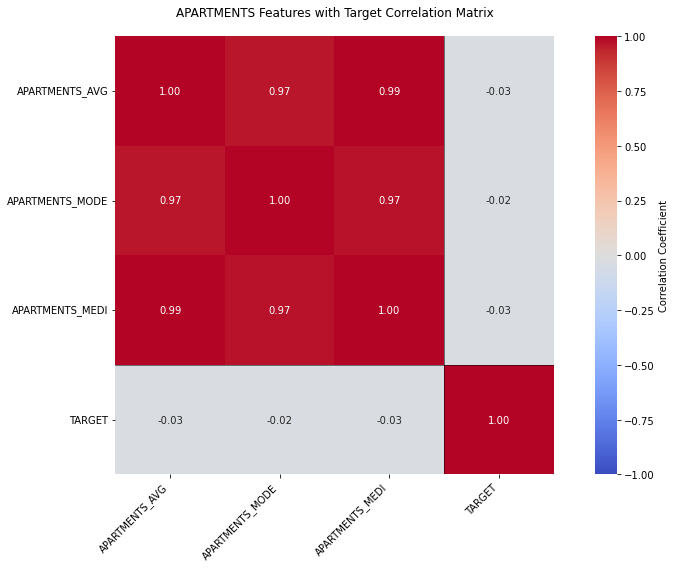


APARTMENTS features correlation with TARGET:
TARGET             1.000000
APARTMENTS_MODE   -0.024464
APARTMENTS_MEDI   -0.026682
APARTMENTS_AVG    -0.026976
Name: TARGET, dtype: float64



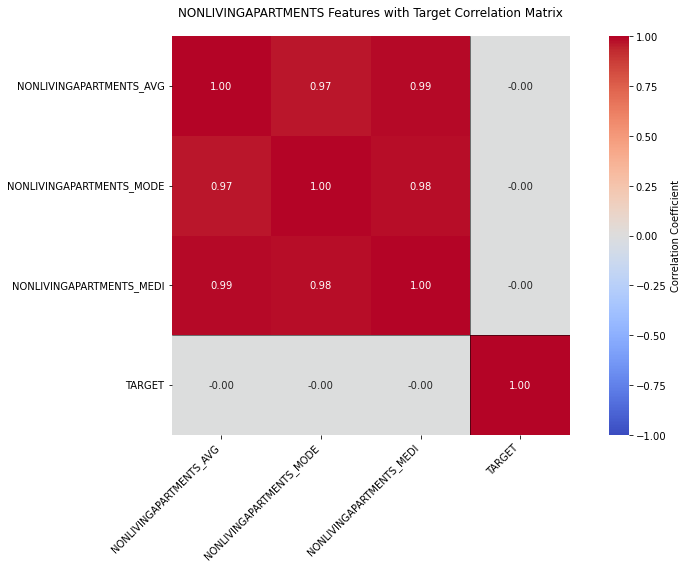


NONLIVINGAPARTMENTS features correlation with TARGET:
TARGET                      1.000000
NONLIVINGAPARTMENTS_MODE   -0.000453
NONLIVINGAPARTMENTS_MEDI   -0.001692
NONLIVINGAPARTMENTS_AVG    -0.002142
Name: TARGET, dtype: float64



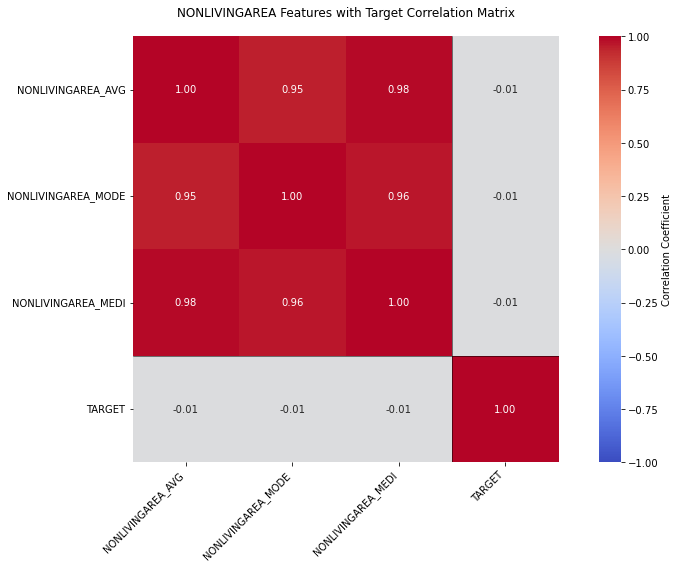


NONLIVINGAREA features correlation with TARGET:
TARGET                1.000000
NONLIVINGAREA_MODE   -0.012880
NONLIVINGAREA_MEDI   -0.013560
NONLIVINGAREA_AVG    -0.014163
Name: TARGET, dtype: float64



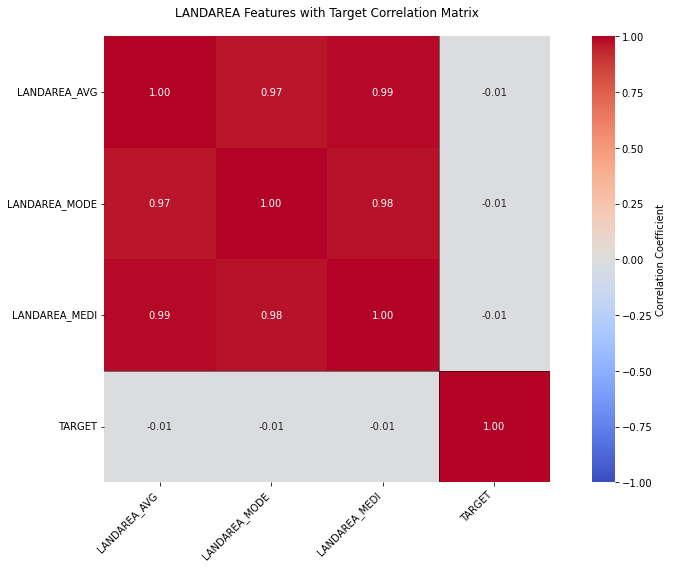


LANDAREA features correlation with TARGET:
TARGET           1.000000
LANDAREA_MODE   -0.010505
LANDAREA_AVG    -0.010826
LANDAREA_MEDI   -0.011366
Name: TARGET, dtype: float64



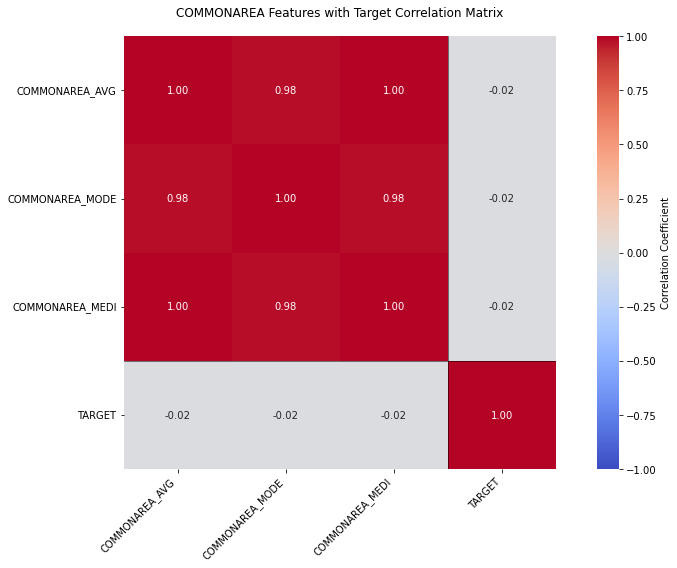


COMMONAREA features correlation with TARGET:
TARGET             1.000000
COMMONAREA_MODE   -0.016340
COMMONAREA_AVG    -0.018550
COMMONAREA_MEDI   -0.018573
Name: TARGET, dtype: float64



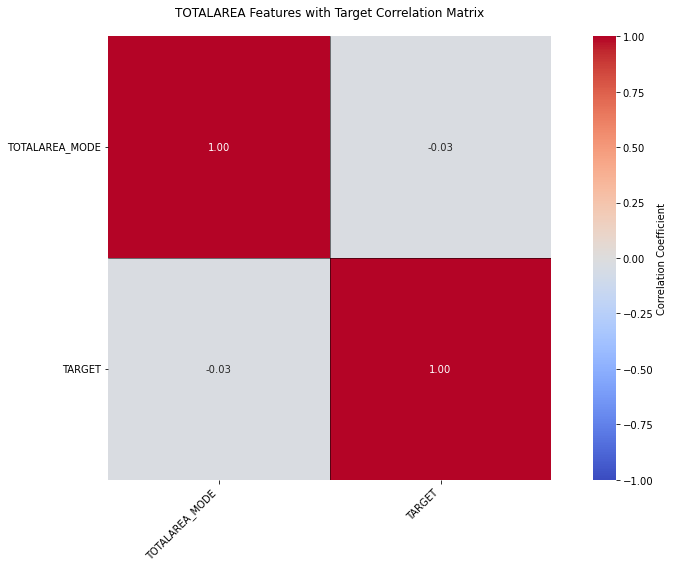


TOTALAREA features correlation with TARGET:
TARGET            1.000000
TOTALAREA_MODE   -0.028221
Name: TARGET, dtype: float64



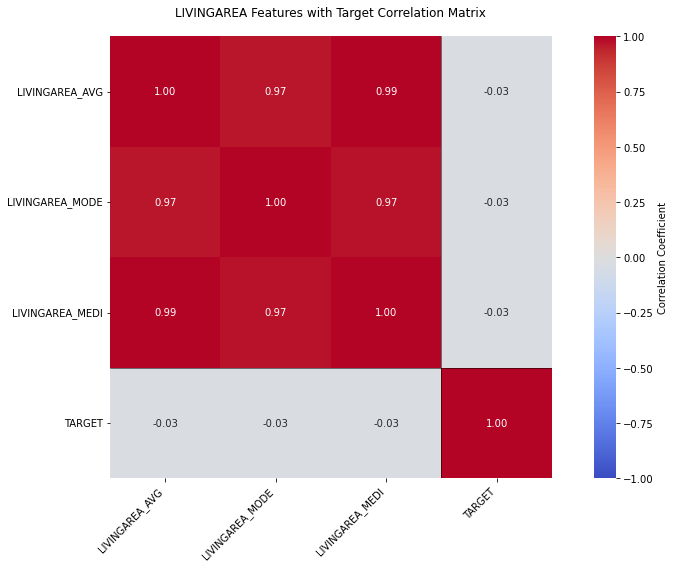


LIVINGAREA features correlation with TARGET:
TARGET             1.000000
LIVINGAREA_MODE   -0.026908
LIVINGAREA_MEDI   -0.029194
LIVINGAREA_AVG    -0.029650
Name: TARGET, dtype: float64



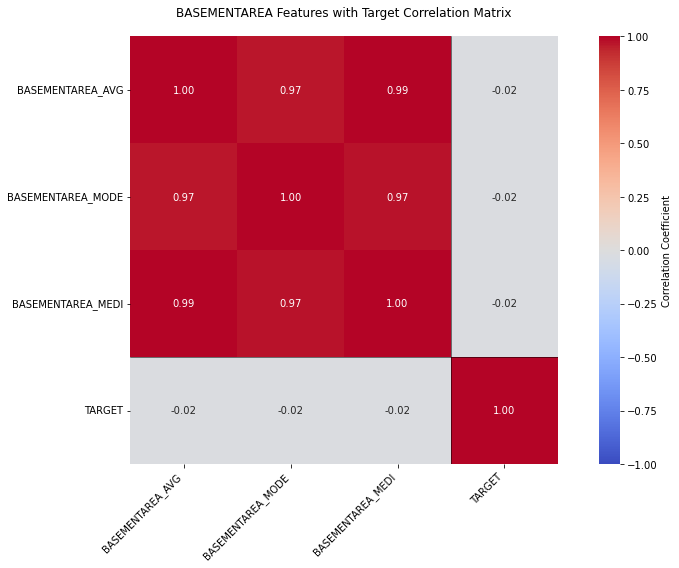


BASEMENTAREA features correlation with TARGET:
TARGET               1.000000
BASEMENTAREA_MODE   -0.017095
BASEMENTAREA_MEDI   -0.019415
BASEMENTAREA_AVG    -0.020246
Name: TARGET, dtype: float64



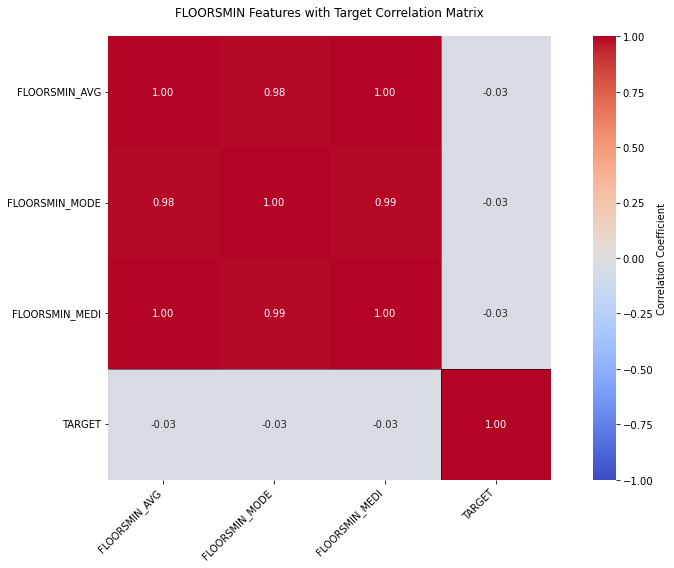


FLOORSMIN features correlation with TARGET:
TARGET            1.000000
FLOORSMIN_MODE   -0.032985
FLOORSMIN_MEDI   -0.033746
FLOORSMIN_AVG    -0.033971
Name: TARGET, dtype: float64



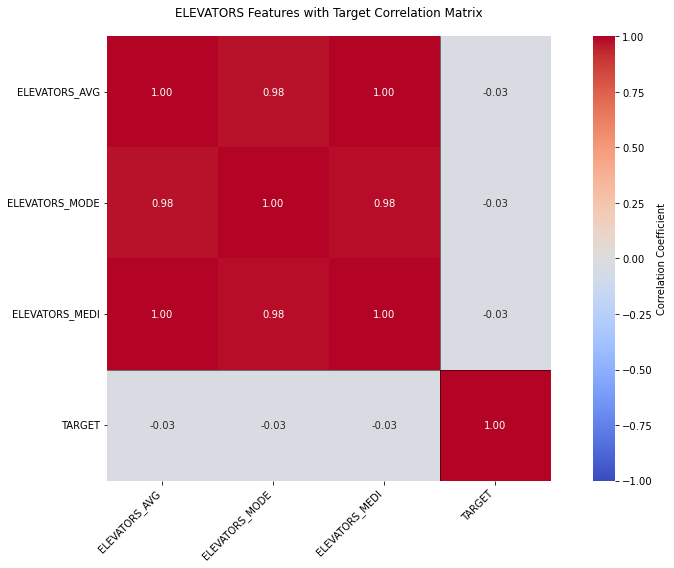


ELEVATORS features correlation with TARGET:
TARGET            1.000000
ELEVATORS_MODE   -0.031675
ELEVATORS_MEDI   -0.033726
ELEVATORS_AVG    -0.034176
Name: TARGET, dtype: float64



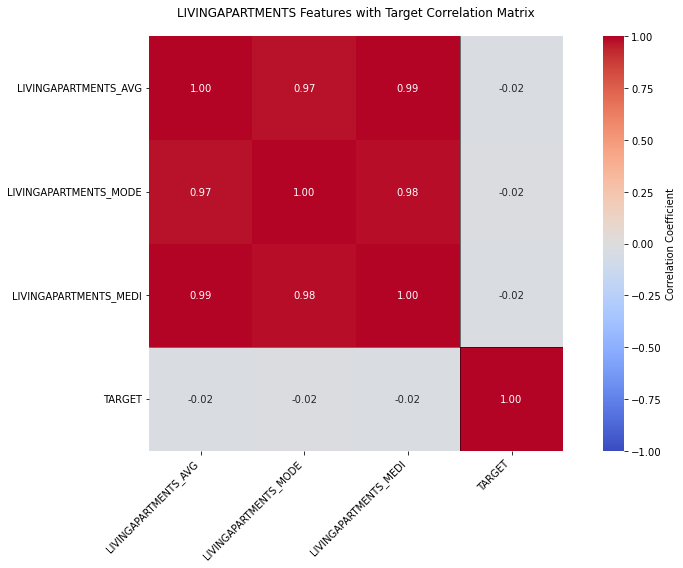


LIVINGAPARTMENTS features correlation with TARGET:
TARGET                   1.000000
LIVINGAPARTMENTS_MODE   -0.023199
LIVINGAPARTMENTS_MEDI   -0.024231
LIVINGAPARTMENTS_AVG    -0.024704
Name: TARGET, dtype: float64



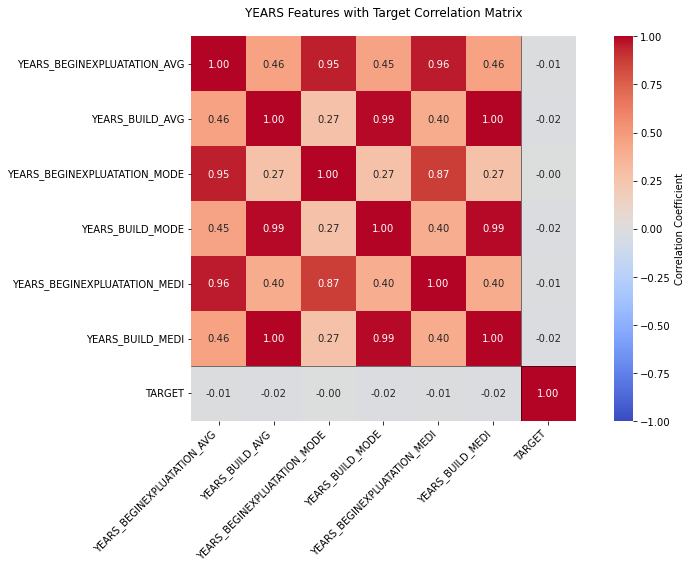


YEARS features correlation with TARGET:
TARGET                          1.000000
YEARS_BEGINEXPLUATATION_MODE   -0.004155
YEARS_BEGINEXPLUATATION_MEDI   -0.008062
YEARS_BEGINEXPLUATATION_AVG    -0.008592
YEARS_BUILD_MODE               -0.022026
YEARS_BUILD_AVG                -0.022217
YEARS_BUILD_MEDI               -0.022413
Name: TARGET, dtype: float64



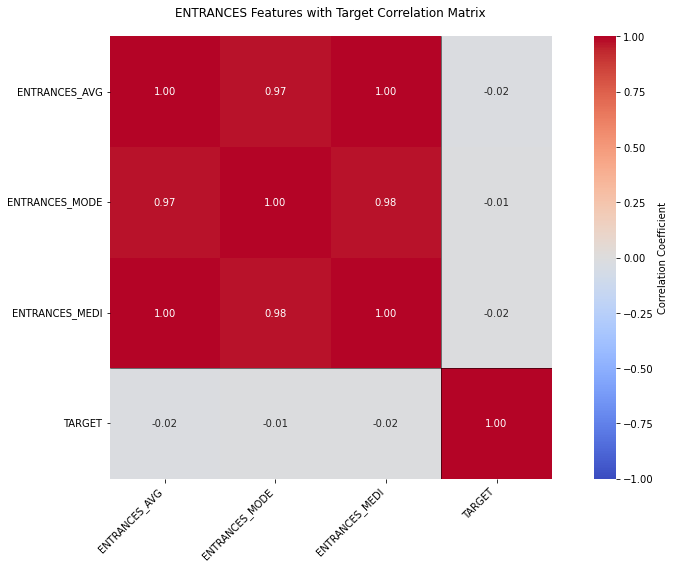


ENTRANCES features correlation with TARGET:
TARGET            1.000000
ENTRANCES_MODE   -0.013589
ENTRANCES_MEDI   -0.015462
ENTRANCES_AVG    -0.015671
Name: TARGET, dtype: float64



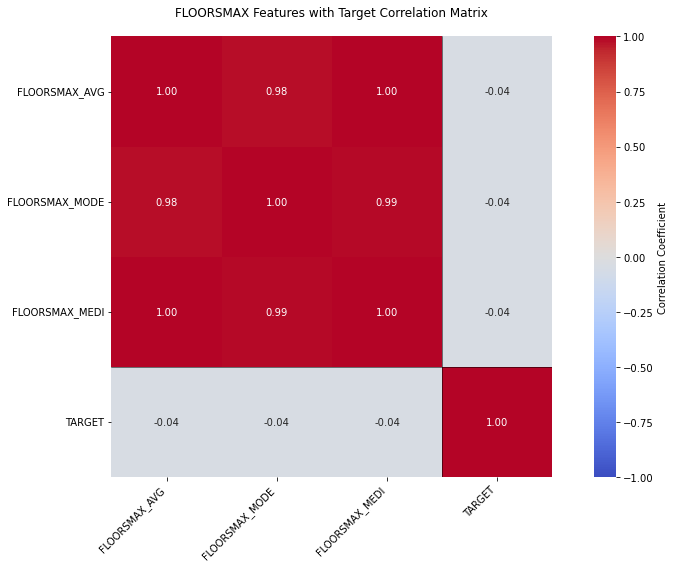


FLOORSMAX features correlation with TARGET:
TARGET            1.000000
FLOORSMAX_MODE   -0.039553
FLOORSMAX_MEDI   -0.040314
FLOORSMAX_AVG    -0.040376
Name: TARGET, dtype: float64



In [17]:
plot_correlation_heatmaps_with_target(df_filled, 'TARGET')